# Predicting cab booking cancellation - Modeling<a id='1.0'></a>
## Capstone Project 2 : Springboard Data Science Career Track
### Michael Bobal



### Table of Contents
* [1.0 Capstone 2](#1.0)
    * [1.1 Introduction](#1.1)
    * [1.2 Purpose](#1.2)
    * [1.3 Approach](#1.3)
* [2.0 Data Overview](#2.0)            
* [3.0 Import the necessary libraries and the data](#3.0)
    * [3.1 Load the data](#3.1)
* [4.0 Utilizing the data](#4.0)
    * [4.1 Inspecting data](#4.1)
    * [4.2 Eliminating excess info from the data](#4.2)
    * [4.3 Pruning the data down to features and target](#4.3)
    * [4.4 Grouping and aggregation](#4.4)
    * [4.5 Encoding the categorical independent variable](#4.5)
    * [4.6 Visualizing our target](#4.6)
    * [4.7 Anonymizing the data by removing the identifying variable](#4.7)
* [5.0 Begin modeling process](#5.0)
    * [5.1 Split dataframe into features and target](#5.1)
    * [5.2 Preliminary modeling](#5.2)
    * [5.3 Scaling the data](#5.3)
    * [5.4 Running a logistic regression model as a test](#5.4)
* [6.0 Applying the Machine Learning models](#6.0)
    * [6.1 Oversampling](#6.1)
    * [6.2 Final realizations about the data](#6.2)
* [7.0 Conclusions](#7.0)


##### 1.1 Introduction: <a id='1.1'></a>

According to the Centers for Disease Control (CDC), in the United States, congenital heart defects (CHDs) are the most common types of birth defects. CHDs affect nearly 1% of children born, totalling nearly 40,000 cases per year. Of those 1% of children born with CHDs, about 25% have a critical CHD. Infants with critical CHDs will need surgery within their first year of life in order to prevent unnecessary death. Children in the fetal stage of development can also suffer from in-utero hypoxia - and even death - if certain fetal cardiac issues are not detected in time.

Cardiotocography (CTG) is a non-invasive medical test used to assess fetal heart rhythm, as well as uterine contractions in the mother. Obstetricians use information acquired from CTG to assess fetal health, make determinations about the necessity of preventative C-sections, and inform parents about possible health issues which may require surgical intervention for the child.

Currently, highly-trained physicians are required for the reading of CTG data, where they determine if the fetus’ CTG reading class (a.k.a. Fetal CTG Class) is normal, suspect, or pathologic (N, S, or P, respectively). An accurate determination is a critical step for parents, obstetricians, surgeons, and hospitals in terms of preparedness for medical intervention (C-section to save the life of the fetus, possible cardiac surgery in the first year of life after birth, etc.)

##### 1.2 Purpose<a id='1.2'></a>

Using CTG data obtained from the research paper, Ayres de Campos et al. [1], and the UCI Machine Learning Laboratory [2], we aim to build several models that can be trained to accurately predict the Fetal CTG Class from an input characterizing a CTG.

[1] Ayres de Campos et al. (2000) SisPorto 2.0 A Program for Automated Analysis of Cardiotocograms. J Matern Fetal Med 5:311-318.

[2] Ayres de Campos et al. (2000). UCI Machine Learning Repository . Irvine, CA: University of California, School of Information and Computer Science. https://archive.ics.uci.edu/ml/datasets/cardiotocography


##### 1.3 Approach<a id='1.3'></a>

The plan is to use several supervised machine learning algorithms to predict the classification of our main target, based on the features of the CTG reading:

LB - FHR baseline (beats per minute)
AC - # of accelerations per second
FM - # of fetal movements per second
UC - # of uterine contractions per second
DL - # of light decelerations per second
DS - # of severe decelerations per second
DP - # of prolonged decelerations per second
ASTV - percentage of time with abnormal short term variability
MSTV - mean value of short term variability
ALTV - percentage of time with abnormal long term variability
MLTV - mean value of long term variability
Width - width of FHR histogram
Min - minimum of FHR histogram
Max - Maximum of FHR histogram
Nmax - # of histogram peaks
Nzeros - # of histogram zeros
Mode - histogram mode
Mean - histogram mean
Median - histogram median
Variance - histogram variance
Tendency - histogram tendency

While the dependent variable will be our categorical target:
NSP - Fetal CTG Class (N=normal; S=suspect; P=pathologic)

The available dataset also provides an alternative target, known as the FHR Pattern Class Code, which is a number between 1 and 10. We will explore the use of this target as well.

Multiple classification algorithms will be used and they will be compared with respect to appropriate performance metrics. We will also explore so-called ensemble methods [3, 4].

Finally, we will explore some interpretability approaches to characterize how the variation of independent variables affect the target/s [5]


[3] https://machinelearningmastery.com/tour-of-ensemble-learning-algorithms/

[4] https://sebastianraschka.com/pdf/lecture-notes/stat479fs18/07_ensembles_slides.pdf

[5] https://christophm.github.io/interpretable-ml-book/


#### 2.0 Data Overview<a id='2.0'></a>

The plan is to use several supervised machine learning algorithms to predict the classification of our main target, based on the features of the CTG reading.

The UCI Machine Learning Repository supplied this data.
The features include the following:

* LB - FHR baseline (beats per minute)
* AC - # of accelerations per second
* FM - # of fetal movements per second
* UC - # of uterine contractions per second
* DL - # of light decelerations per second
* DS - # of severe decelerations per second
* DP - # of prolonged decelerations per second
* ASTV - percentage of time with abnormal short term variability
* MSTV - mean value of short term variability
* ALTV - percentage of time with abnormal long term variability
* MLTV - mean value of long term variability
* Width - width of FHR histogram
* Min - minimum of FHR histogram
* Max - Maximum of FHR histogram
* Nmax - # of histogram peaks
* Nzeros - # of histogram zeros
* Mode - histogram mode
* Mean - histogram mean
* Median - histogram median
* Variance - histogram variance
* Tendency - histogram tendency

The dependent variable will be our categorical target:
* NSP - Fetal CTG Class:
    * N=normal
    * S=suspect
    * P=pathologic



#### 3.0 Import the necessary libraries and the data<a id='3.0'></a>

First we import all the necessary modules and libraries.

In [1]:
import os
import math 
import numpy as np
import pandas as pd
import scipy as sp

from datetime import datetime
#
# plotting and visualization
#
import matplotlib as mpl
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
#
import seaborn as sns
#
# modeling
#
from sklearn.preprocessing import OneHotEncoder as OHE
import sklearn.model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import StratifiedKFold
from sklearn import linear_model
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, recall_score, precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score


#ignore warning messages to ensure clean outputs
import warnings
warnings.filterwarnings('ignore')

##### 3.1 Load the data<a id='3.1'></a>

In [2]:
fileloc = r'C:\Users\Joseph Shire\Documents\Springboard Python Data Science\Python Scripts\springboard\Capstone2\Fetal health idea\CTG.xls'

The original file is loaded

In [3]:
# load our file for inspection
file = pd.ExcelFile(fileloc)

Next, we have to select the proper sheet of the file

In [4]:
# inspect sheet names
file.sheet_names

['Description', 'Data', 'Raw Data']

In [5]:
# import the cardiotocography excel file, specifically the 'Raw Data' sheet
ctg_file = pd.read_excel(fileloc, sheet_name = 'Raw Data')

#### 4.0 Utilizing the data<a id='4.0'></a>

Then we inspect the data, see what column names there are and what type of data each contains.

##### 4.1 Inspecting data<a id='4.1'></a>

In [6]:
# check the column names and data types
ctg_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2130 entries, 0 to 2129
Data columns (total 40 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   FileName  2126 non-null   object        
 1   Date      2126 non-null   datetime64[ns]
 2   SegFile   2126 non-null   object        
 3   b         2126 non-null   float64       
 4   e         2126 non-null   float64       
 5   LBE       2126 non-null   float64       
 6   LB        2126 non-null   float64       
 7   AC        2126 non-null   float64       
 8   FM        2127 non-null   float64       
 9   UC        2127 non-null   float64       
 10  ASTV      2127 non-null   float64       
 11  MSTV      2127 non-null   float64       
 12  ALTV      2127 non-null   float64       
 13  MLTV      2127 non-null   float64       
 14  DL        2128 non-null   float64       
 15  DS        2128 non-null   float64       
 16  DP        2128 non-null   float64       
 17  DR        2128

In [7]:
# get the shape of the data
ctg_file.shape

(2130, 40)

Now we visualize what the data looks like as a dataframe.

In [8]:
# visualize the data
ctg_file.head(10)


,FileName,Date,SegFile,b,e,LBE,LB,AC,FM,UC,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Variab10.txt,1996-12-01,CTG0001.txt,240.0,357.0,120.0,120.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,2.0
2,Fmcs_1.txt,1996-05-03,CTG0002.txt,5.0,632.0,132.0,132.0,4.0,0.0,4.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
3,Fmcs_1.txt,1996-05-03,CTG0003.txt,177.0,779.0,133.0,133.0,2.0,0.0,5.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
4,Fmcs_1.txt,1996-05-03,CTG0004.txt,411.0,1192.0,134.0,134.0,2.0,0.0,6.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
5,Fmcs_1.txt,1996-05-03,CTG0005.txt,533.0,1147.0,132.0,132.0,4.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0
6,Fmcs_2.txt,1996-05-03,CTG0006.txt,0.0,953.0,134.0,134.0,1.0,0.0,10.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,8.0,3.0
7,Fmcs_2.txt,1996-05-03,CTG0007.txt,240.0,953.0,134.0,134.0,1.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,8.0,3.0
8,Hasc_1.txt,1995-02-22,CTG0008.txt,62.0,679.0,122.0,122.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,3.0
9,Hasc_1.txt,1995-02-22,CTG0009.txt,120.0,779.0,122.0,122.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,3.0


Already, we spy a row with 'NaN' values. Either way, we inspect the data to see the amount of missing data.

In [9]:
# count missing values
missing = pd.concat([ctg_file.isnull().sum(), 100 * ctg_file.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by="count" ,ascending=False)

,count,%
FileName,4,0.187793
Date,4,0.187793
Nzeros,4,0.187793
Mode,4,0.187793
Mean,4,0.187793
Median,4,0.187793
Variance,4,0.187793
Tendency,4,0.187793
A,4,0.187793
B,4,0.187793


In [10]:
nullF = ctg_file[ctg_file.isnull().any(axis=1)]
nullF

,FileName,Date,SegFile,b,e,LBE,LB,AC,FM,UC,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2127,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2128,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2129,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,564.0,23.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


This seems to be a case of "extra values" instead of "missing values" based on the uniformity of the missingness.
All of the known important columns (FileName, Date, Mean/Median/Mode) are said to be 'missing' 4 values, so all columns should theoretically have 4 fewer values than the height of the data (2130).

Threfore, we will remove any row not containing a file name, which is a logical choice as exclusion criteria (no file name = not included)

##### 4.2 Eliminating excess info from the data<a id='4.2'></a>

In [11]:
ctg_file.drop(ctg_file[ctg_file["FileName"].isnull()].index, inplace=True)

In [12]:
# Re-check the shape to ensure it has 2126 rows
ctg_file.shape

(2126, 40)

Again, we visualize what the data looks like as a dataframe.

In [13]:
# visualize again
ctg_file.head()

,FileName,Date,SegFile,b,e,LBE,LB,AC,FM,UC,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
1,Variab10.txt,1996-12-01,CTG0001.txt,240.0,357.0,120.0,120.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,2.0
2,Fmcs_1.txt,1996-05-03,CTG0002.txt,5.0,632.0,132.0,132.0,4.0,0.0,4.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
3,Fmcs_1.txt,1996-05-03,CTG0003.txt,177.0,779.0,133.0,133.0,2.0,0.0,5.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
4,Fmcs_1.txt,1996-05-03,CTG0004.txt,411.0,1192.0,134.0,134.0,2.0,0.0,6.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
5,Fmcs_1.txt,1996-05-03,CTG0005.txt,533.0,1147.0,132.0,132.0,4.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0


As noted in the previous notebook, there are repeat filenames with different data, which turned out to be the same patient receiving the CTG testing multiple times on a single day.

In [14]:
ctg_file["FileName"].nunique()

352

The total number of unique files (352) will be our indication of the true number of patients in this dataset of 2126 entries.

With that scale of reduction in data, how many times was the CTG test repeated per patient? In order to find out, we counted how many occurances of each filename exist in our data.

In [15]:
fnvc = pd.DataFrame(ctg_file["FileName"].value_counts()).rename(columns={'FileName': 'count'})
fnvc

,count
S8001034.dsp,34
S7001029.dsp,33
S8001037.dsp,30
S8001038.dsp,26
S7001027.dsp,24
...,...
S7001006.dsp,1
S7001008.dsp,1
Mepfp_3.txt,1
Mrmmf_1.txt,1


In order to visualize 352 rows, a table is less useful than a graph, so we use a bar graph of the frequency of each total number of tests per patient.

Text(0, 0.5, 'Frequency')

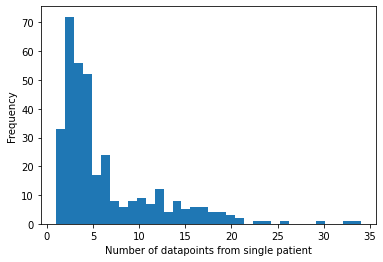

In [16]:
plt.hist(fnvc, bins=max(fnvc['count']))
plt.xlabel("Number of datapoints from single patient")
plt.ylabel("Frequency")

The distribution of test counts per patient is vast, with a plurality of patients receiving 2 CTG tests, and most of the patients receiving 6 or fewer. However, even with this leftward skew, there are still some patients who had the CTG test repeated 30 or more times!

We will need to find a proper way to aggregate each patients' multiple datapoints into single datapoints, but first, we need to eliminate unnecessary columns in our data.

##### 4.3 Pruning the data down to features and target<a id='4.3'></a>

In [17]:
cut = ["Date","b","e","LBE","DR","SegFile","A","B","C","D","E","AD","DE","LD","FS","SUSP","CLASS"]

ctg = ctg_file.loc[:, ~ctg_file.columns.isin(cut)]
ctg.head()

,FileName,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,NSP
1,Variab10.txt,120.0,0.0,0.0,0.0,73.0,0.5,43.0,2.4,0.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
2,Fmcs_1.txt,132.0,4.0,0.0,4.0,17.0,2.1,0.0,10.4,2.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
3,Fmcs_1.txt,133.0,2.0,0.0,5.0,16.0,2.1,0.0,13.4,2.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
4,Fmcs_1.txt,134.0,2.0,0.0,6.0,16.0,2.4,0.0,23.0,2.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
5,Fmcs_1.txt,132.0,4.0,0.0,5.0,16.0,2.4,0.0,19.9,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


##### 4.4 Grouping and aggregation<a id='4.4'></a>

We seperate columns representing numbers from columns representing categories.

In [18]:
cols = ctg.iloc[:,list(range(0,21))]
cols.head()

,FileName,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,...,DP,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance
1,Variab10.txt,120.0,0.0,0.0,0.0,73.0,0.5,43.0,2.4,0.0,...,0.0,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0
2,Fmcs_1.txt,132.0,4.0,0.0,4.0,17.0,2.1,0.0,10.4,2.0,...,0.0,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0
3,Fmcs_1.txt,133.0,2.0,0.0,5.0,16.0,2.1,0.0,13.4,2.0,...,0.0,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0
4,Fmcs_1.txt,134.0,2.0,0.0,6.0,16.0,2.4,0.0,23.0,2.0,...,0.0,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0
5,Fmcs_1.txt,132.0,4.0,0.0,5.0,16.0,2.4,0.0,19.9,0.0,...,0.0,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0


In [19]:
cat_cols = ctg.iloc[:,[0,-2,-1]]
cat_cols.head()

,FileName,Tendency,NSP
1,Variab10.txt,1.0,2.0
2,Fmcs_1.txt,0.0,1.0
3,Fmcs_1.txt,0.0,1.0
4,Fmcs_1.txt,1.0,1.0
5,Fmcs_1.txt,1.0,1.0


We will aggregate the instances of multiple data points for each single patient using the mean.


For the numeric data, the average of each feature will be used.


For the categorical data, the encoding is ordinal: each successive gradation is a different value on a scale. Therefore, we can actually take the mean of each variable, and round to the nearest whole number.
For example, if, among 4 tests, 'NSP' values are 1, 1, 1, 2, then the NSP average for that subject would be 1.25.
Rounding to the nearest whole number puts the aggregate value to be used in our modeling at 1.

So, we complete this step by using 'FileName' as the grouping column, and taking the mean of each value, rounding only the categorical (ordinal) variables.

In [20]:
ctg_mean = cols.groupby("FileName").agg('mean',numeric_only=True)
ctg_cat = cat_cols.groupby("FileName").agg('mean')
ctg_cat = ctg_cat.round(0)
ctg_fe = pd.concat([ctg_mean,ctg_cat],axis=1)
ctg_fe

,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,NSP
FileName,,,,,,,,,,,,,,,,,,,,,
Aast_1.txt,119.333333,0.111111,8.000000,0.000000,53.555556,0.655556,8.333333,10.433333,0.111111,0.0,...,85.777778,132.666667,2.777778,0.222222,122.888889,121.666667,123.333333,1.555556,0.0,1.0
Aast_10.txt,123.000000,1.727273,2.363636,0.000000,51.818182,0.790909,3.272727,12.818182,0.000000,0.0,...,64.636364,142.454545,4.818182,0.000000,128.636364,128.000000,129.818182,3.545455,1.0,1.0
Aast_11.txt,121.000000,2.666667,4.000000,0.000000,55.333333,0.566667,2.666667,8.633333,0.000000,0.0,...,98.666667,138.666667,1.000000,0.000000,125.666667,127.666667,128.666667,2.666667,0.0,1.0
Aast_12.txt,125.000000,0.000000,4.666667,0.666667,67.000000,0.300000,59.333333,4.733333,0.000000,0.0,...,115.666667,130.000000,0.333333,0.000000,125.000000,124.333333,126.000000,0.000000,0.0,2.0
Aast_13.txt,125.000000,0.000000,4.000000,1.000000,68.000000,0.400000,24.500000,6.900000,0.500000,0.0,...,80.500000,132.000000,3.000000,0.000000,122.500000,122.000000,123.500000,1.500000,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tffm_2.txt,124.000000,10.000000,0.000000,6.000000,34.000000,1.000000,0.000000,2.000000,0.500000,0.0,...,108.000000,148.500000,2.000000,0.000000,127.500000,130.000000,130.500000,6.000000,0.0,1.0
Tffm_3.txt,123.000000,0.800000,0.000000,0.400000,39.000000,0.960000,14.200000,12.000000,0.000000,0.0,...,61.600000,143.000000,4.800000,0.200000,126.200000,125.800000,126.800000,2.800000,1.0,1.0
Tffm_4.txt,123.000000,0.500000,0.000000,3.500000,52.000000,0.500000,8.500000,8.000000,0.000000,0.0,...,116.000000,141.000000,2.500000,0.000000,126.000000,127.000000,128.000000,2.000000,0.0,1.0


##### 4.5 Encoding the categorical independent variable<a id='4.5'></a>

In [21]:
ctg_fe['Tendency'].value_counts()

 0.0    211
 1.0    127
-1.0     14
Name: Tendency, dtype: int64

The feature "Tendency" is a categorical variable, and will need dummies applied

In [22]:
df = pd.get_dummies(ctg_fe, columns = ['Tendency'], drop_first=True)
df

,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,...,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,NSP,Tendency_0.0,Tendency_1.0
FileName,,,,,,,,,,,,,,,,,,,,,
Aast_1.txt,119.333333,0.111111,8.000000,0.000000,53.555556,0.655556,8.333333,10.433333,0.111111,0.0,...,132.666667,2.777778,0.222222,122.888889,121.666667,123.333333,1.555556,1.0,1,0
Aast_10.txt,123.000000,1.727273,2.363636,0.000000,51.818182,0.790909,3.272727,12.818182,0.000000,0.0,...,142.454545,4.818182,0.000000,128.636364,128.000000,129.818182,3.545455,1.0,0,1
Aast_11.txt,121.000000,2.666667,4.000000,0.000000,55.333333,0.566667,2.666667,8.633333,0.000000,0.0,...,138.666667,1.000000,0.000000,125.666667,127.666667,128.666667,2.666667,1.0,1,0
Aast_12.txt,125.000000,0.000000,4.666667,0.666667,67.000000,0.300000,59.333333,4.733333,0.000000,0.0,...,130.000000,0.333333,0.000000,125.000000,124.333333,126.000000,0.000000,2.0,1,0
Aast_13.txt,125.000000,0.000000,4.000000,1.000000,68.000000,0.400000,24.500000,6.900000,0.500000,0.0,...,132.000000,3.000000,0.000000,122.500000,122.000000,123.500000,1.500000,2.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tffm_2.txt,124.000000,10.000000,0.000000,6.000000,34.000000,1.000000,0.000000,2.000000,0.500000,0.0,...,148.500000,2.000000,0.000000,127.500000,130.000000,130.500000,6.000000,1.0,1,0
Tffm_3.txt,123.000000,0.800000,0.000000,0.400000,39.000000,0.960000,14.200000,12.000000,0.000000,0.0,...,143.000000,4.800000,0.200000,126.200000,125.800000,126.800000,2.800000,1.0,0,1
Tffm_4.txt,123.000000,0.500000,0.000000,3.500000,52.000000,0.500000,8.500000,8.000000,0.000000,0.0,...,141.000000,2.500000,0.000000,126.000000,127.000000,128.000000,2.000000,1.0,1,0


The target 'NSP' contains 3 variables: 1 for Normal CTG, 2 for Suspect CTG, 3 for Pathological CTG. We will replace the numbers with letters designating which category each datapoint belongs to.

In [23]:
df['NSP'] = df['NSP'].replace({1.0:'N',2.0:'S',3.0:'P'})

##### 4.6 Visualizing our target<a id='4.6'></a>

In [24]:
nsp = ['N','S','P']

In [25]:
class_counts_nsp = df['NSP'].value_counts()
class_p_nsp = pd.Series([(x / df.shape[0]) * 100.00 for x in class_counts_nsp])

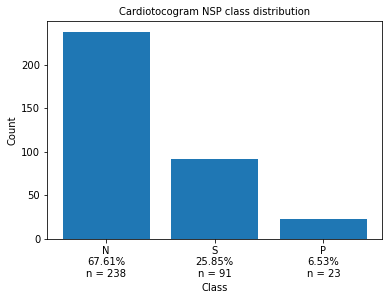

In [26]:
fig, ax = plt.subplots()
ax.bar(class_counts_nsp.index, class_counts_nsp)
ax.set_xticks([0,1,2])

a=ax.get_xticks().tolist()
for i in a:    
    a[i] = nsp[i]+'\n' + class_p_nsp.round(2).astype(str)[i] + '%'+'\n' +'n = '+class_counts_nsp.astype(str)[i]
ax.set_xticklabels(a)
ax.set_ylabel('Count')
ax.set_xlabel('Class')
ax.set_title('Cardiotocogram NSP class distribution',
              fontsize = 10)
plt.show()

Due to the nature of health sciences having the main purpose of supporting well-being of patients, we have determined to eliminate the "Suspect" class from our initial analysis. At-risk fetuses are either in health danger (Pathological class), or not (Normal class). In this notebook, we will endeavour to reclassify these 91 patients into one of the binary classes of Normal or Pathological, and inspect the results through graphical visualizations.

Having made this determination, we will thus remove "S" class datapoints from our data during this preprocessing step.


In [27]:
df2 = df[df['NSP'] != 'S']
df2['NSP'].value_counts()

N    238
P     23
Name: NSP, dtype: int64

Save the S class for later analysis.

In [28]:
S_class = df[df['NSP'] == 'S']

Now we can visualize the target as it will be in our main analysis.

In [29]:
class_counts_np = df2['NSP'].value_counts()
class_p_np = pd.Series([(x / df2.shape[0]) * 100.00 for x in class_counts_np])

In [30]:
nsp = ['N','P']

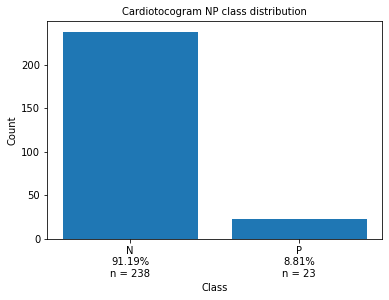

In [31]:
fig, ax = plt.subplots()
ax.bar(class_counts_np.index, class_counts_np)
ax.set_xticks([0,1])

a=ax.get_xticks().tolist()
for i in a:
        a[i] = nsp[i]+'\n' + class_p_np.round(2).astype(str)[i] + '%'+'\n' +'n = '+class_counts_np.astype(str)[i]
ax.set_xticklabels(a)
ax.set_ylabel('Count')
ax.set_xlabel('Class')
ax.set_title('Cardiotocogram NP class distribution',
              fontsize = 10)
plt.show()

In [32]:
df2=df2.reset_index()

##### 4.7 Anonymizing the data by removing the identifying variable<a id='4.7'></a>

In [33]:
dfd = df2.drop(columns="FileName")
dfd.head()

,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,...,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,NSP,Tendency_0.0,Tendency_1.0
0,119.333333,0.111111,8.000000,0.0,53.555556,0.655556,8.333333,10.433333,0.111111,0.0,...,132.666667,2.777778,0.222222,122.888889,121.666667,123.333333,1.555556,N,1,0
1,123.000000,1.727273,2.363636,0.0,51.818182,0.790909,3.272727,12.818182,0.000000,0.0,...,142.454545,4.818182,0.000000,128.636364,128.000000,129.818182,3.545455,N,0,1
2,121.000000,2.666667,4.000000,0.0,55.333333,0.566667,2.666667,8.633333,0.000000,0.0,...,138.666667,1.000000,0.000000,125.666667,127.666667,128.666667,2.666667,N,1,0
3,120.000000,0.000000,8.500000,0.0,54.000000,0.850000,0.000000,15.200000,0.000000,0.0,...,133.000000,4.000000,0.000000,124.000000,122.000000,124.000000,5.000000,N,0,1
4,124.000000,3.000000,10.000000,1.0,46.000000,0.800000,0.000000,7.500000,0.000000,0.0,...,142.000000,4.000000,0.000000,129.000000,130.000000,131.000000,2.000000,N,0,1


##### 5.1 Split dataframe into features and target<a id='5.1'></a>

Setting our features as the X variable, and targets as the y variable for use in our modeling.

In [34]:
X = dfd.drop(columns = ['NSP'])

In [35]:
y = dfd['NSP']

In [36]:
print(X.head(),y.head())

           LB        AC         FM   UC       ASTV      MSTV      ALTV  \
0  119.333333  0.111111   8.000000  0.0  53.555556  0.655556  8.333333   
1  123.000000  1.727273   2.363636  0.0  51.818182  0.790909  3.272727   
2  121.000000  2.666667   4.000000  0.0  55.333333  0.566667  2.666667   
3  120.000000  0.000000   8.500000  0.0  54.000000  0.850000  0.000000   
4  124.000000  3.000000  10.000000  1.0  46.000000  0.800000  0.000000   

        MLTV        DL   DS  ...        Min         Max      Nmax    Nzeros  \
0  10.433333  0.111111  0.0  ...  85.777778  132.666667  2.777778  0.222222   
1  12.818182  0.000000  0.0  ...  64.636364  142.454545  4.818182  0.000000   
2   8.633333  0.000000  0.0  ...  98.666667  138.666667  1.000000  0.000000   
3  15.200000  0.000000  0.0  ...  60.000000  133.000000  4.000000  0.000000   
4   7.500000  0.000000  0.0  ...  90.000000  142.000000  4.000000  0.000000   

         Mode        Mean      Median  Variance  Tendency_0.0  Tendency_1.0  
0 

In [37]:
y.value_counts()

N    238
P     23
Name: NSP, dtype: int64

##### 5.2 Preliminary modeling<a id='5.2'></a>

Start by training a single model on a single set of parameters, to see what non-tuned results might look like

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, stratify = y)

In [39]:
y_train.value_counts()

N    166
P     16
Name: NSP, dtype: int64

In [40]:
y_test.value_counts()

N    72
P     7
Name: NSP, dtype: int64

This class imbalance is roughly 10:1 in favor of the negative class (N).

In a fortuitous stroke of pure coincidence, the negative class is "N" for "Normal", and the positive class is "P" for "Pathological".

##### 5.3 Scaling the data<a id='5.3'></a>


Due to the data containing vastly different scales, we will use Standard Scaler to ensure all of the data have equal footing, 

In [41]:
sc = StandardScaler()
sX_train = pd.DataFrame(sc.fit_transform(X_train),columns=X_train.columns)
sX_test = pd.DataFrame(sc.transform(X_test),columns=X_test.columns)

##### 5.4 Running a logistic regression model as a test<a id='5.4'></a>


In [42]:
lr = LogisticRegression(solver = 'saga', penalty = 'l2', max_iter = 5000, C=100)

In [43]:
lr.fit(sX_train, y_train)

LogisticRegression(C=100, max_iter=5000, solver='saga')

In [44]:
dfcoef = pd.DataFrame(lr.coef_,columns=X_train.columns).T
dfcoef

,0
LB,0.233646
AC,-1.263528
FM,0.221550
UC,-2.106855
ASTV,3.834073
MSTV,-0.212093
ALTV,1.819966
MLTV,-0.608797
DL,-0.279079
DS,0.000000


In [45]:
y_pred_tr = lr.predict(sX_train)
y_pred = lr.predict(sX_test)

In [46]:
print("Classification Report for Training Data")
print(classification_report(y_train, y_pred_tr))

Classification Report for Training Data
              precision    recall  f1-score   support

           N       1.00      1.00      1.00       166
           P       1.00      1.00      1.00        16

    accuracy                           1.00       182
   macro avg       1.00      1.00      1.00       182
weighted avg       1.00      1.00      1.00       182



In [47]:
print("Classification Report for Test Data")
print(classification_report(y_test, y_pred))

Classification Report for Test Data
              precision    recall  f1-score   support

           N       1.00      0.99      0.99        72
           P       0.88      1.00      0.93         7

    accuracy                           0.99        79
   macro avg       0.94      0.99      0.96        79
weighted avg       0.99      0.99      0.99        79



The results of our initial algorithm show excellent performance on the training set - as we would expect - and unusually decent performance on the test set. This is likely partially a product of the fact that we only have 7 positive test samples to work with when using 70% training size split.

Setting aside (for now) continued suspicions regarding the performance of a simple model on the data, we continue on.

Due to the small size of the overall dataset, and the small size of the positive class, we will need to use oversampling techniques as part of our process.

#### 6.0 Applying the Machine Learning models<a id='6.0'></a>


As this is a supervised classification problem, we can use the following classification models:
* Logistic Regression
* Random Forest
* K-Nearest Neighbor (KNN)
* Support vector machine (SVM)
* Naive Bayes
* Gradient Boost
* XGBoost

First, however, we can use oversampling techniques to make our small dataset seem larger, and possible improve the fit of our models by making new datapoints using the old ones.

##### 6.1 Oversampling<a id='6.1'></a>

As discussed, certain oversampling methods may help to increase the goodness of fit for our data, resulting in algorithms that produce more accurate models

Python library scikit learn has many available oversampling methods available. We will utilize RandomOverSampler and multiple varieties of Synthetic Minority Over-sampling Technique (SMOTE) such as BorderlineSMOTE, SMOTENC, ADASYN, KMeansSMOTE, SVMSMOTE.

Therefore, a function is used to loop through the different oversampling techniques, while also testing the performance of models fit to that oversampled data. For this part, we will utilize Logistic Regression and Random Forest Classifier.

In [48]:
def oversample(X_train, X_test, y_train, y_test, cat_feat,score):
    
    """
    cat_feat is a list of categorical features by column index
    
    score is what output is desired, with choices:
        "N-precision" 
        "N-recall"
        "P-precision"
        "P-recall"
    """
    
    #use pre-scaled data
    
    
    #code to time how long this code runs for
    start_timeLR = datetime.now()
    
    from imblearn.over_sampling import SMOTE, BorderlineSMOTE, SMOTENC, ADASYN, RandomOverSampler, KMeansSMOTE, SVMSMOTE
    from sklearn.ensemble import RandomForestClassifier
    resamplers = [None, RandomOverSampler(), BorderlineSMOTE(), SMOTENC(categorical_features=cat_feat), ADASYN(), KMeansSMOTE(), SVMSMOTE()]
    algos = [LogisticRegression(solver = 'saga', penalty = 'l2', max_iter = 5000, C=100),
             RandomForestClassifier()]
    cr = []
    cols = []
    for r in resamplers:
        if r is not None:
            # fit the model
            X,y = r.fit_resample(X_train, y_train)
            print('______________________________________')
            print('______________________________________')
            print('\nResampler = ',r)

            for algo in algos:
                a = algo
                a.fit(X,y)
                y_pred = a.predict(X_test)
                clrepd = classification_report(y_test, y_pred, output_dict=True)
                clrep = classification_report(y_test, y_pred)
                cr.append(clrepd)

                cols.append('{} {}'.format(r,a))

                print('*************')
                print('Algorithm = ',a)
                print("Classification Report for Test Data")
                print(clrep)
        else:
            X,y = X_train, y_train
            print('______________________________________')
            print('______________________________________')
            print('\nResampler = ',r)

            for algo in algos:
                a = algo
                a.fit(X,y)
                y_pred = a.predict(X_test)
                clrepd = classification_report(y_test, y_pred, output_dict=True)
                clrep = classification_report(y_test, y_pred)
                cr.append(clrepd)

                cols.append('{} {}'.format(r,a))

                print('*************')
                print('Algorithm = ',a)
                print("Classification Report for Test Data")
                print(clrep)
            
    crd = pd.DataFrame(cr, index=cols).T
    
    
    Nprecision = []
    Nrecall = []
    Pprecision = []
    Precall = []
    for i in crd.iloc[0]:
        Nprecision.append(i['precision'])
        Nrecall.append(i['recall'])
    for i in crd.iloc[1]:
        Pprecision.append(i['precision'])
        Precall.append(i['recall'])
    
    Npdf = pd.DataFrame(Nprecision, index=cols, columns = [score]).T
    Nrdf = pd.DataFrame(Nrecall, index=cols, columns = [score]).T
    Ppdf = pd.DataFrame(Pprecision, index=cols, columns = [score]).T
    Prdf = pd.DataFrame(Precall, index=cols, columns = [score]).T
    
    
    end_timeLR = datetime.now()
    print('Duration of this segment: {}'.format(end_timeLR - start_timeLR))
    if score == "N-precision":
        return Npdf
    elif score == "N-recall":
        return Nrdf
    elif score == "P-precision":
        return Ppdf
    elif score == "P-recall":
        return Prdf
    else:
        return crd
    

Because our main concern is having a high recall for the positive class "P", we will focus on recall as our scoring metric.

In [49]:
P_recall = oversample(sX_train, sX_test, y_train, y_test,cat_feat=[20,21], score="P-recall")

______________________________________
______________________________________

Resampler =  None
*************
Algorithm =  LogisticRegression(C=100, max_iter=5000, solver='saga')
Classification Report for Test Data
              precision    recall  f1-score   support

           N       1.00      0.99      0.99        72
           P       0.88      1.00      0.93         7

    accuracy                           0.99        79
   macro avg       0.94      0.99      0.96        79
weighted avg       0.99      0.99      0.99        79

*************
Algorithm =  RandomForestClassifier()
Classification Report for Test Data
              precision    recall  f1-score   support

           N       1.00      0.99      0.99        72
           P       0.88      1.00      0.93         7

    accuracy                           0.99        79
   macro avg       0.94      0.99      0.96        79
weighted avg       0.99      0.99      0.99        79

______________________________________
___

In [50]:
P_recall

,"None LogisticRegression(C=100, max_iter=5000, solver='saga')",None RandomForestClassifier(),"RandomOverSampler() LogisticRegression(C=100, max_iter=5000, solver='saga')",RandomOverSampler() RandomForestClassifier(),"BorderlineSMOTE() LogisticRegression(C=100, max_iter=5000, solver='saga')",BorderlineSMOTE() RandomForestClassifier(),"SMOTENC(categorical_features=[20, 21]) LogisticRegression(C=100, max_iter=5000, solver='saga')","SMOTENC(categorical_features=[20, 21]) RandomForestClassifier()","ADASYN() LogisticRegression(C=100, max_iter=5000, solver='saga')",ADASYN() RandomForestClassifier(),"KMeansSMOTE() LogisticRegression(C=100, max_iter=5000, solver='saga')",KMeansSMOTE() RandomForestClassifier(),"SVMSMOTE() LogisticRegression(C=100, max_iter=5000, solver='saga')",SVMSMOTE() RandomForestClassifier()
P-recall,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


A frustratingly accurate result has occured. A few of the models score 100% for accuracy, precision, recall, and f1. This is simply not a realistic result.

Another way to demonstrate the performance of each oversampling technique is to leave the test data alone and instead split the training data into k-1 y-stratified groups, leaving a validation set to test on.

In order to accomplish this, I created a similar function which takes the mean cross-validation recall score of 3 k-folds.

In [51]:
def oversampleK(X_train, X_test, y_train, y_test, cat_feat):
    
    """
    cat_feat is a list of categorical features by column index
    
    scoring is recall
    """
    
    #use pre-scaled data
    
    
    #code to time how long this code runs for
    start_timeLR = datetime.now()
    from sklearn.model_selection import cross_validate, cross_val_score
    from imblearn.over_sampling import SMOTE, BorderlineSMOTE, SMOTENC, ADASYN, RandomOverSampler, KMeansSMOTE, SVMSMOTE
    from sklearn.ensemble import RandomForestClassifier
    
    resamplers = [None, RandomOverSampler(), BorderlineSMOTE(), SMOTENC(categorical_features=cat_feat), ADASYN(), KMeansSMOTE(), SVMSMOTE()]
    algos = [LogisticRegression(solver = 'saga', penalty = 'l2', max_iter = 5000, C=100),
             RandomForestClassifier()]
    cvs = []
    cols = []
    skf = StratifiedKFold(n_splits=3, shuffle=True)
    
    
    for r in resamplers:
        if r is not None:
            # fit the model
            X,y = r.fit_resample(X_train, y_train)

            for algo in algos:
                al = algo
                cv_r = np.mean(cross_val_score(al, X,y, scoring="recall_macro",
                    cv=StratifiedKFold(n_splits=3, shuffle=True)))
                cvs.append(cv_r)
                cols.append('{} {}'.format(r,al))

        else:
            X,y = X_train, y_train

            for algo in algos:
                al = algo
                cv_r = np.mean(cross_val_score(al, X,y, scoring="recall_macro",
                    cv=StratifiedKFold(n_splits=3, shuffle=True)))
                cvs.append(cv_r)
                cols.append('{} {}'.format(r,al))
            
    crd = pd.DataFrame(cvs, index=cols, columns = ['Recall Score'])
    

    
    end_timeLR = datetime.now()
    print('Duration of this segment: {}'.format(end_timeLR - start_timeLR))
    
    return crd
    

In [52]:
oversampleK(sX_train, sX_test, y_train, y_test, cat_feat=[20,21])

Duration of this segment: 0:00:04.857023


,Recall Score
"None LogisticRegression(C=100, max_iter=5000, solver='saga')",0.935462
None RandomForestClassifier(),0.783333
"RandomOverSampler() LogisticRegression(C=100, max_iter=5000, solver='saga')",0.987933
RandomOverSampler() RandomForestClassifier(),1.000000
"BorderlineSMOTE() LogisticRegression(C=100, max_iter=5000, solver='saga')",0.987987
BorderlineSMOTE() RandomForestClassifier(),0.991017
"SMOTENC(categorical_features=[20, 21]) LogisticRegression(C=100, max_iter=5000, solver='saga')",0.985011
"SMOTENC(categorical_features=[20, 21]) RandomForestClassifier()",0.993939
"ADASYN() LogisticRegression(C=100, max_iter=5000, solver='saga')",0.981872
ADASYN() RandomForestClassifier(),0.993939


##### 6.2 Final realizations about the data<a id='6.2'></a>

At this juncture, it still appears as though there is a problem with the data. Some of the models, without even the benefit of hyperparameter tuning, are able to achieve perfect recall - an extremely unlikely outcome.

Unfortunately, upon further inspection of the raw data, I discovered that the researchers responsible for the dataset made an unintelligable decision regarding their samples. In the prior notebook, we discovered that single patients had multiple entries for CTG results. This time, after really digging into the raw data, I discovered two things: 
1. The entries corresponding to each patient were not unique CTG instances at all. They overlapped in time. Some of the datapoints encompassed entirely the rest of that patient's data.
2. Some unseen data leakage is continuing to occur, even after the fixes we established.

I tried to reach out to the authors of the original study (who would have overseen data collection), but they never responded. This was a piece of research done more than 20 years ago in Portugal.

As a fellow published author of research, and without intending to denigrate the work done by these individuals, I would make this assessment: in this situation, everything from the data collection process to the writing of the research article was not on par with scientific standards.

The most confusing aspect of this scenario is this dataset's inclusion in the UCI Machine Learning Repository. The data is presented as 2126 unique datapoints ripe for machine learning classification algorithms. However, the real number of actionable unique datapoints is a mere fraction of that, and the way it was collected makes impossible the interpretation of the data values presented.

If this project was an assignment from an employer, my report would include the aforementioned analysis, as well as subsequent strong suggestions for data collection improvements and the implementation of a strict, simple, standard process for data collection and entry.

#### 7.0 Conclusion<a id='7.0'></a>

After noticing a problem with data leakage in the previous notebook (Preprocessing and Training), we decided to "start over" in this "Modeling" notebook.

We began by importing the necessary modules and uploading the data.

Then, after inspecting the data, we eliminated excess info from the data and pruned the data down to features and target.

As a remedial step, we then grouped and aggregated the data in order to eliminate data leakage caused by the poor construction of this dataset.

After encoding the categorical independent variable and visualizing the target, the last of the data editing occured as the subject identification column was removed.

We started the modeling process as normal, with a train/test split followed by feature scaling.

Recall was the chosen performance metric due to the nature of our designated problem.

Then we ran a simple logistic regression in order to establish a starting point.

However, the test data performed very well. Our suspicions were raised regarding continued data leakage.

Continuing on in the event that the data was somehow good, we applied oversampling techniques due to the imbalanced nature of our target class (10:1).

Using cross-validation with stratified K-fold, we saw that BorderlineSMOTE, SMOTENC, ADASYN, RandomOverSampler, KMeansSMOTE, and SVMSMOTE all performed extremely well on recall. Unfortunately, some of the models achieved a perfect recall score. This was the proverbial 'straw that broke the camel's back' for my efforts. In consultation with my advisor, discussing this scenario as a potential real-life disappointment, we agreed to close down the project due to bad data.

In conclusion, we tried to overcome a poorly constructed dataset by reducing the obvious data leakage. After attempting to model the fixed data, we still found the results to be too exemplary to be real. Unfortunately, for this reason, this project needs to come to an end without a fulfilling conclusion.